# 6COM1044 - Data Classification Coursework
- Marcelo Pedroza Hernandez
- UH Student ID: 23033126
- April 10, 2024

In [1]:
#Used Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Task 1 - Data Exploration
- Use Principal Component Analysis (PCA) to understand the characteristics of the datasets.

In [2]:
# Task 1 - (a)

# Load the training and test datasets
train_df = pd.read_csv("../mlnc_DATA/wdbc_training.csv")
test_df = pd.read_csv("../mlnc_DATA/wdbc_test.csv")

# Save the 30 features and the labels in separate variables for both datasets
y_train_I = train_df.iloc[:, 1]
X_train_I = train_df.iloc[:, 2:32]
y_test = test_df.iloc[:, 1]
X_test = test_df.iloc[:, 2:32]

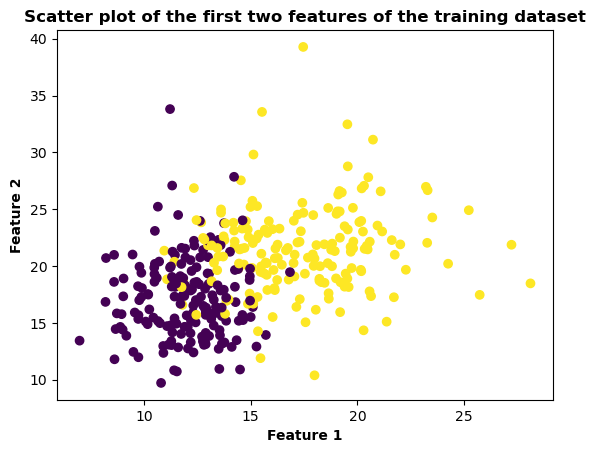

In [3]:
# Task 1 - (b)

# Show a scatter plot of the first two features of the training dataset
plt.scatter(X_train_I.iloc[:, 0], X_train_I.iloc[:, 1], c=y_train_I)
plt.xlabel('Feature 1', fontweight='bold')
plt.ylabel('Feature 2', fontweight='bold')
plt.title('Scatter plot of the first two features of the training dataset', fontweight='bold')
plt.show()

In [4]:
# Task 1 - (c)

# Normalise the training (I) and test datasets
X_train_I_norm = StandardScaler().fit_transform(X_train_I)
X_test_norm = StandardScaler().fit_transform(X_test)

# Report the mean and standard deviation for the first feature in the normalised test set
mean_test_norm_feature1 = np.mean(X_test_norm[:, 0])
print("Mean of the first feature in the normalised test set: ", mean_test_norm_feature1)  # Near 0 = OK
std_test_norm_feature1 = np.std(X_test_norm[:, 0])
print("Standard deviation of the first feature in the normalised test set: ", std_test_norm_feature1)  # Near 1 = OK

Mean of the first feature in the normalised test set:  -5.312071888158644e-17
Standard deviation of the first feature in the normalised test set:  0.9999999999999999


In [5]:
# Task 1 - (d)

# Perform a PCA analysis on the scaled training set (I)
pca = PCA( )
projections = pca.fit_transform(X_train_I_norm)  # The projections matrix represents the eigenvectors of the covariance matrix
print(f"PCA Projections Shape: {projections.shape}")  # Confirm the shape of the projections matrix matches the number of features

# Report how much variance has been captured in the PCA analysis
variance_ratios = pca.explained_variance_ratio_
print(f"\nVariance Captured by each PCA component:\n {variance_ratios}")  # Order of variance ratios is the order of the PCA components
variance_ratio_sum = np.sum(variance_ratios)  # Confirm the sum of the variance ratios is 1
print(f"\nSum of Variance Captured by PCA components: {variance_ratio_sum}")


PCA Projections Shape: (360, 30)

Variance Captured by each PCA component:
 [4.43606862e-01 1.91824039e-01 1.02551948e-01 5.85787475e-02
 4.96835548e-02 3.98816657e-02 2.25912562e-02 1.63373291e-02
 1.40936045e-02 1.14164312e-02 1.06760893e-02 9.00097065e-03
 7.86088289e-03 5.15507021e-03 3.23654164e-03 2.62141466e-03
 2.10410383e-03 1.92452722e-03 1.44303536e-03 1.12628084e-03
 9.75993691e-04 9.19406503e-04 6.95175730e-04 6.03693626e-04
 5.23470504e-04 2.52293483e-04 2.27284914e-04 5.53799241e-05
 2.83129826e-05 4.63331178e-06]

Sum of Variance Captured by PCA components: 1.0


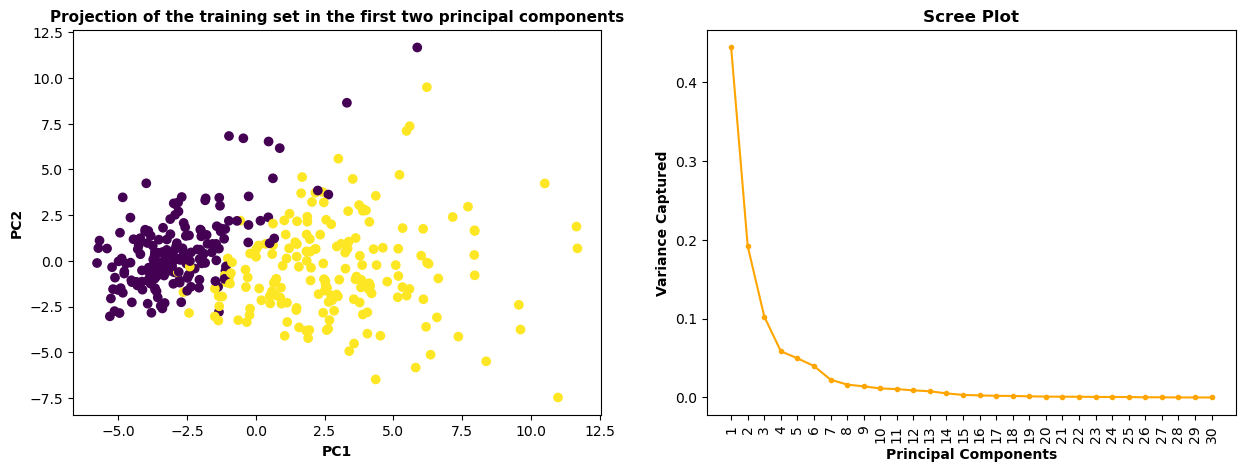

In [6]:
# Task 1 - (d) Plots

# Create a figure with two subplots
figure1, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a scatter plot of the projections of the training set (I) in the first two principal components
ax[0].scatter(projections[:, 0], projections[:, 1], c=y_train_I) 
ax[0].set_xlabel('PC1', fontweight='bold')
ax[0].set_ylabel('PC2', fontweight='bold')
ax[0].set_title('Projection of the training set in the first two principal components', fontweight='bold', fontsize=11)

# Create a scree plot of the variance captured by each principal component
ax[1].plot(range(1, 31), variance_ratios, marker='.', color='orange') 
ax[1].set_xlabel('Principal Components', fontweight='bold')
ax[1].set_ylabel('Variance Captured', fontweight='bold')
ax[1].set_title('Scree Plot', fontweight='bold')
ax[1].set_xticks(range(1, 31))
ax[1].tick_params(axis='x', rotation=90) # Rotate the x-axis labels to avoid overlap

 
plt.show()
figure1.savefig('Task1_D_Plots.png')

### Task 2 - Data Preparation
- Divide the training dataset into a smaller training set and a validation set, and normalise the data.

In [7]:
# Task 2 - (a)

# Divide the training set using 30% as the validation set, randomly selecting the points
X_train_II, X_val, y_train_II, y_val = train_test_split(X_train_I, y_train_I, test_size=0.3, random_state=42, stratify=y_train_I)  # 42 is the answer to everything :)

# Report the number of points in each set
print(f"Number of points in the smaller training set: {X_train_II.shape[0]}")
print(f"Number of points in the validation set: {X_val.shape[0]}")

Number of points in the smaller training set: 252
Number of points in the validation set: 108


In [8]:
# Task 2 - (b)

# Normalise the smaller training set (II)
X_train_II_norm = StandardScaler().fit_transform(X_train_II)

# Normalise the validation set
X_val_norm = StandardScaler().fit_transform(X_val)

# Report the mean and standard deviation for all features in the normalised smaller training set (II)
mean_train_II_norm_all_features = np.mean(X_train_II_norm, axis=0)
print(f"\nMean of the features in the normalised smaller training set:\n {mean_train_II_norm_all_features}")  # Near 0 = OK
std_train_II_norm_all_features = np.std(X_train_II_norm, axis=0)
print(f"Standard Deviation of the features in the normalised smaller training set:\n {std_train_II_norm_all_features}")  # Near 1 (unit std) = OK

# Report the mean and standard deviation for all features in the normalised validation set 
mean_val_norm_all_features = np.mean(X_val_norm, axis=0)
print(f"\nMean of the features in the normalised validation set:\n {mean_val_norm_all_features}")  # Near 0 = OK
std_val_norm_all_features = np.std(X_val_norm, axis=0)
print(f"Standard Deviation of the features in the normalised validation set:\n {std_val_norm_all_features}")  # Near 1 (unit std) = OK


Mean of the features in the normalised smaller training set:
 [ 4.22942105e-17 -3.52451754e-17  7.04903508e-17 -8.45884209e-17
  6.76707367e-16  4.93432455e-17  5.63922806e-17 -4.93432455e-17
 -2.92534956e-16  2.96059473e-16 -5.81545394e-17  5.63922806e-17
  4.05319517e-17 -3.87696929e-17 -5.99167982e-17 -1.33931666e-16
 -5.28677631e-17 -3.03108508e-16  4.33515657e-16  3.17206578e-16
  2.39667193e-16  3.91221447e-16  4.22942105e-17  2.96059473e-16
  1.23358114e-16 -3.01346250e-16 -6.34413157e-17  2.67863333e-16
  3.63025306e-16  3.24255614e-16]
Standard Deviation of the features in the normalised smaller training set:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Mean of the features in the normalised validation set:
 [-8.38835174e-16 -7.64820306e-16  5.71559261e-16 -1.22330130e-16
 -2.32324448e-16  1.47001752e-16  6.27070412e-17 -8.84066483e-17
 -4.74928738e-16  3.64420428e-16 -2.11764762e-16 -5.42775701e-16
  2.36436385e-16  1.4186183

### Task 3 - SVM Classification
- Build a support vector classifier using SVC from sklearn library.

In [15]:
# Task 3 - (a) Linear Kernel with C in [2, 52]

# Evaluate performance using a linear kernel with three different C values
print("\nClassification Reports for Linear Kernel with Different C Values on smaller training set (II) and validation set:")

# Smallest C value
svc1_lin = SVC(kernel='linear', C=2)  
model1_lin = svc1_lin.fit(X_train_II_norm, y_train_II)
y_pred1_lin = model1_lin.predict(X_val_norm)
print(f"Classification Report for C=2:\n{classification_report(y_val, y_pred1_lin)}")

# Middle C value
svc2_lin = SVC(kernel='linear', C=27)  
model2_lin = svc2_lin.fit(X_train_II_norm, y_train_II)
y_pred2_lin = model2_lin.predict(X_val_norm)
print(f"Classification Report for C=27:\n{classification_report(y_val, y_pred2_lin)}")

# Largest C value
svc3_lin = SVC(kernel='linear', C=52)
model3_lin = svc3_lin.fit(X_train_II_norm, y_train_II)
y_pred3_lin = model3_lin.predict(X_val_norm)
print(f"Classification Report for C=52:\n{classification_report(y_val, y_pred3_lin)}")


Classification Reports for Linear Kernel with Different C Values on smaller training set (II) and validation set:
Classification Report for C=2:
              precision    recall  f1-score   support

           2       0.95      0.98      0.96        54
           4       0.98      0.94      0.96        54

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108

Classification Report for C=27:
              precision    recall  f1-score   support

           2       0.94      0.94      0.94        54
           4       0.94      0.94      0.94        54

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108

Classification Report for C=52:
              precision    recall  f1-score   support

           2       0.94      0.94      0.94        54
           4       0.94    

In [16]:
# Task 3 - (a) RBF Kernel with C in [2, 52] and gamma in [0.01, 12]

# Evaluate performance using an RBF kernel with three different C and gamma values
print("\nClassification Reports for RBF Kernel with Different C and Gamma Values:")

# Smallest C and gamma values
svm1_rbf = SVC(kernel='rbf', C=2, gamma=0.01)
model1_rbf = svm1_rbf.fit(X_train_II_norm, y_train_II)
y_pred1_rbf = model1_rbf.predict(X_val_norm)
print(f"Classification Report for C=2 and gamma=0.01:\n{classification_report(y_val, y_pred1_rbf)}")

# Geometric means of the C and gamma values
svm2_rbf = SVC(kernel='rbf', C=27, gamma=0.35)  
model2_rbf = svm2_rbf.fit(X_train_II_norm, y_train_II)
y_pred2_rbf = model2_rbf.predict(X_val_norm)
print(f"Classification Report for C=27 and gamma=0.35:\n{classification_report(y_val, y_pred2_rbf)}")

# Largest C and gamma values
svm3_rbf = SVC(kernel='rbf', C=52, gamma=12)  
model3_rbf = svm3_rbf.fit(X_train_II_norm, y_train_II)
y_pred3_rbf = model3_rbf.predict(X_val_norm)
print(f"Classification Report for C=52 and gamma=12:\n{classification_report(y_val, y_pred3_rbf)}")


Classification Reports for RBF Kernel with Different C and Gamma Values:
Classification Report for C=2 and gamma=0.01:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        54
           4       0.98      0.98      0.98        54

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108

Classification Report for C=27 and gamma=0.35:
              precision    recall  f1-score   support

           2       0.97      0.65      0.78        54
           4       0.74      0.98      0.84        54

    accuracy                           0.81       108
   macro avg       0.85      0.81      0.81       108
weighted avg       0.85      0.81      0.81       108

Classification Report for C=52 and gamma=12:
              precision    recall  f1-score   support

           2       1.00      0.02      0.04        54
           4       0.50  

In [11]:
# Task 3 - (c) Further Evaluation of the Best-Performing Model from Task 3 - (a)

# Evaluate the best-performing model on the whole normalised training set
svm_best = SVC(kernel='rbf', C=2, gamma=0.01) # Best C and gamma values from Task 3 (a)
model_best = svm_best.fit(X_train_I_norm, y_train_I)
y_pred_best = model_best.predict(X_test_norm)
print(f"\nClassification Report for the best-performing model:\n{classification_report(y_test, y_pred_best)}")

# Evaluate using the Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(f"\nConfusion Matrix for the best-performing model:\n{conf_matrix_best}")
print(f"TP, FP, FN, TN: {conf_matrix_best.ravel()}")


Classification Report for the best-performing model:
              precision    recall  f1-score   support

           2       1.00      0.64      0.78       177
           4       0.34      1.00      0.50        32

    accuracy                           0.70       209
   macro avg       0.67      0.82      0.64       209
weighted avg       0.90      0.70      0.74       209


Confusion Matrix for the best-performing model:
[[114  63]
 [  0  32]]
TP, FP, FN, TN: [114  63   0  32]


### Task 4 - SVM classification with features reduced using PCA
- Extract features using PCA and building a support vector classifier with extracted features on the training set.

In [12]:
# Task 4 - (b)

# Reduce the features in the normalised training set (I) using the first 4 principal components
pca_chosen = PCA(n_components=4)
proj_X_train_I_norm_pca = pca_chosen.fit_transform(X_train_I_norm)   
print(f"\nShape of the reduced training set (I) using the first 4 principal components: {proj_X_train_I_norm_pca.shape}")

# Reduce the features in the normalised test set using the first 4 principal components
proj_X_test_norm_pca = pca_chosen.transform(X_test_norm)
print(f"Shape of the reduced test set using the first 4 principal components: {proj_X_test_norm_pca.shape}")

# Report how much variance has been captured in the PCA analysis with the first 4 principal components
variance_ratios_pca = pca_chosen.explained_variance_ratio_
print(f"\nVariance Captured by the first 4 PCA components:\n {variance_ratios_pca}")  # Order of variance ratios is the order of the PCA components
variance_ratio_sum_pca = np.sum(variance_ratios_pca)  # Confirm the sum of the variance ratios is 1
print(f"\nSum of Variance Captured by the first 4 PCA components: {variance_ratio_sum_pca}")


Shape of the reduced training set (I) using the first 4 principal components: (360, 4)
Shape of the reduced test set using the first 4 principal components: (209, 4)

Variance Captured by the first 4 PCA components:
 [0.44360686 0.19182404 0.10255195 0.05857875]

Sum of Variance Captured by the first 4 PCA components: 0.7965615971389541


In [18]:
# Task 4 - (c)

# Normalise the training set and the test set after the feature reduction
proj_X_train_I_norm_pca = StandardScaler().fit_transform(proj_X_train_I_norm_pca)
proj_X_test_norm_pca = StandardScaler().fit_transform(proj_X_test_norm_pca)

# Train an SVM model on the training set with reduced features
svm_pca_best = SVC(kernel='rbf', C=2, gamma=0.01)  # Best C and gamma values from Task 3 (b)
model_pca_best = svm_pca_best.fit(proj_X_train_I_norm_pca, y_train_I)

# Test the model on the corresponding test set that is the one with reduced features
y_pred_pca_best = model_pca_best.predict(proj_X_test_norm_pca)

# Evaluate the performance of the model on the test set]
print(f"\nClassification Report for the best-performing model with reduced features:\n{classification_report(y_test, y_pred_pca_best)}")

# Evaluate using the Confusion Matrix
confusion_matrix_pca_best = confusion_matrix(y_test, y_pred_pca_best)
print(f"\nConfusion Matrix for the best-performing model with reduced features:\n{confusion_matrix_pca_best}")
print(f"TP, FP, FN, TN: {confusion_matrix_pca_best.ravel()}")


Classification Report for the best-performing model with reduced features:
              precision    recall  f1-score   support

           2       1.00      0.73      0.85       177
           4       0.41      1.00      0.58        32

    accuracy                           0.78       209
   macro avg       0.70      0.87      0.71       209
weighted avg       0.91      0.78      0.81       209


Confusion Matrix for the best-performing model with reduced features:
[[130  47]
 [  0  32]]
TP, FP, FN, TN: [130  47   0  32]
